In [1]:
import zipfile
zip_ref = zipfile.ZipFile(r"/home/hduser/Downloads/dogs_cats.zip")
zip_ref.extractall(r'/home/hduser/Downloads')
zip_ref.close()

In [20]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2023-10-05 13:30:54.354193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 13:30:54.991609: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 13:30:54.991644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 13:30:54.994412: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 13:30:55.302266: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 13:30:55.304654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/home/hduser/Downloads/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/home/hduser/Downloads/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

2023-10-05 13:31:41.744254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2023-10-05 13:31:41.815932: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2023-10-05 13:31:41.847793: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2023-10-05 13:31:54.689532: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2023-10-05 13:31:54.709186: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.


625/625 [==============================] - 2247s 4s/step - loss: 1.4728 - accuracy: 0.5710 - val_loss: 0.6706 - val_accuracy: 0.6044
Epoch 2/10
625/625 [==============================] - 2602s 4s/step - loss: 0.6182 - accuracy: 0.6654 - val_loss: 0.6031 - val_accuracy: 0.6662
Epoch 3/10
625/625 [==============================] - 2617s 4s/step - loss: 0.5174 - accuracy: 0.7442 - val_loss: 0.6520 - val_accuracy: 0.6704
Epoch 4/10
625/625 [==============================] - 2181s 3s/step - loss: 0.4539 - accuracy: 0.7839 - val_loss: 0.4683 - val_accuracy: 0.7738
Epoch 5/10
625/625 [==============================] - 2245s 4s/step - loss: 0.3921 - accuracy: 0.8228 - val_loss: 0.4941 - val_accuracy: 0.7474
Epoch 6/10
625/625 [==============================] - 1873s 3s/step - loss: 0.3362 - accuracy: 0.8527 - val_loss: 0.5522 - val_accuracy: 0.7802
Epoch 7/10
625/625 [==============================] - 1869s 3s/step - loss: 0.2747 - accuracy: 0.8832 - val_loss: 0.4442 - val_accuracy: 0.8040
Epo

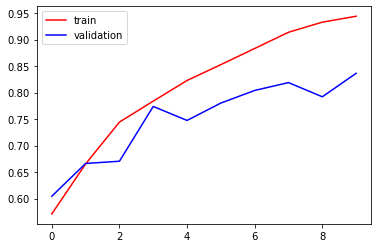

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

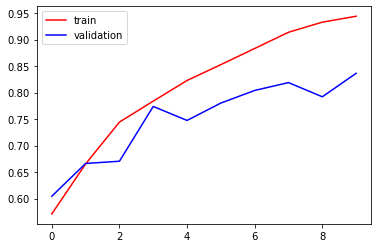

In [11]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

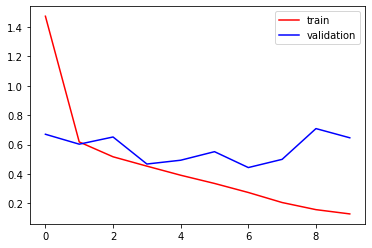

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

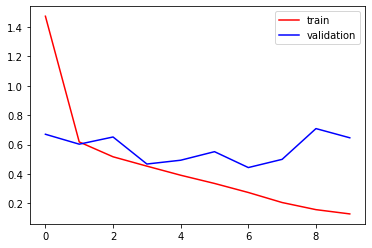

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import cv2

In [42]:
test_img = cv2.imread('/home/hduser/Downloads/dogs_vs_cats/test/cats/cat.10.jpg') 

In [43]:
import numpy as np
import matplotlib.pyplot as plt

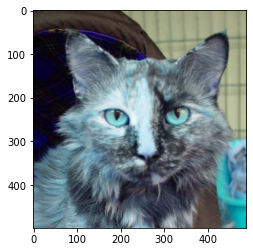

In [44]:
plt.imshow(test_img)

In [45]:
test_img.shape

(499, 489, 3)

In [46]:
test_img = cv2.resize(test_img,(256,256))

In [47]:
test_input = test_img.reshape((1,256,256,3))

In [48]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)